<a href="https://colab.research.google.com/github/xinyanz-erin/Applied-Finance-Project/blob/Erin/22min_Grid_Test_KnockOutCall_3stocks_OldMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial Setup

In [7]:
import pandas as pd

In [8]:
nstock = 3
model_save_name = f'jax_knock_out_{str(nstock)}stocks_oldmethod_2.pth'

# Dataset generation

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
# import cupy
# import jax
# import jax.numpy as jnp
# from jax import random
# from jax import jit
# import numpy as np
# import pandas as pd
# from torch.utils.dlpack import from_dlpack

# def Brownian_motion(key, initial_stocks, numsteps, drift, cov, T):
#     stocks_init = jnp.zeros((numsteps + 1, initial_stocks.shape[0]))
#     stocks_init = jax.ops.index_update(stocks_init,   # jax.ops.index_update(x, idx, y) <-> Pure equivalent of x[idx] = y
#                             jax.ops.index[0],         # initialization of stock prices
#                             initial_stocks)
#     noise = jax.random.multivariate_normal(key,  jnp.array([0]*initial_stocks.shape[0]), cov, (numsteps+1,)) # noise must have mean 0
#     sigma = jnp.diag(cov) ** 0.5
#     dt = T / numsteps
#     def time_step(t, val):
#         dx = jnp.exp((drift - sigma ** 2. / 2.) * dt + jnp.sqrt(dt) * noise[t,:])
#         val = jax.ops.index_update(val,
#                             jax.ops.index[t],
#                             val[t-1] * dx)
#         return val
#     return jax.lax.fori_loop(1, numsteps+1, time_step, stocks_init)[1:] # jax.lax.fori_loop(lower, upper, body_fun, init_val)

# def optionvalueavg(key, initial_stocks, numsteps, drift, r, cov, K, B, T): # down-and-out call
#     return jnp.mean(jnp.maximum((1 - jnp.any(jnp.mean(batch_simple(keys, initial_stocks, numsteps, drift, cov, T), axis=2) < B, axis=1).astype(int))* 
#                                 (jnp.mean(batch_simple(keys, initial_stocks, numsteps, drift, cov, T), axis=2))[:,-1]-K, 0) *
#                     jnp.exp(-r[0] * T))

# goptionvalueavg = jax.grad(optionvalueavg, argnums=1)

# #################################################################### Adjust all parameters here (not inside class)
# numstocks = nstock
# numsteps = 50
# numpaths = 2000000

# rng = jax.random.PRNGKey(np.random.randint(10000))
# rng, key = jax.random.split(rng)
# keys = jax.random.split(key, numpaths)

# S1_range = jnp.linspace(0.75, 1.25, 6)
# S2_range = jnp.linspace(0.75, 1.25, 6)
# S3_range = jnp.linspace(0.75, 1.25, 6)
# K_range = jnp.linspace(0.75, 1.25, 5)
# B_range = jnp.linspace(0.5, 1.0, 6)
# sigma_range = jnp.linspace(0.15, 0.45, 3)
# r_range = jnp.linspace(0.01, 0.04, 3)
# T = 1.0

# fast_simple = jax.jit(Brownian_motion, static_argnums=2)
# batch_simple = jax.vmap(fast_simple, in_axes=(0, None, None, None, None, None))
# ####################################################################

# call = []
# count = 0

# # for S1 in S_range:
# #   for K in K_range:
# #     for B in B_range:
# #       for r in r_range:
# #         for sigma in sigma_range:    

# #           initial_stocks = jnp.array([S]*numstocks) # must be float
# #           r_tmp = jnp.array([r]*numstocks)
# #           drift = r_tmp
# #           cov = jnp.identity(numstocks)*sigma*sigma

# #           Knock_Out_Call_price = optionvalueavg(key, initial_stocks, numsteps, drift, r_tmp, cov, K, B, T)
# #           Deltas = goptionvalueavg(keys, initial_stocks, numsteps, drift, r_tmp, cov, K, B, T)
# #           # call.append([T, K, B, S, sigma, r, r, Knock_Out_Call_price] + list(Deltas)) #T, K, B, S, sigma, mu, r, price, delta
# #           call.append([T, K, S1, sigma, r, r,
# #                          T, K, S2, sigma, r, r,
# #                          T, K, S3, sigma, r, r, Knock_Out_Call_price] + list(Deltas))
          
# #           count += 1
# #           print(count)

# for S1 in S1_range:
#   for S2 in S2_range:
#     for S3 in S3_range:
#       for K in K_range:
#         for B in B_range:
#           for r in r_range:
#             for sigma in sigma_range:
              
#               initial_stocks = jnp.array([S1, S2, S3]) # must be float
#               r_tmp = jnp.array([r]*numstocks)
#               drift = r_tmp
#               cov = jnp.identity(numstocks)*sigma*sigma
              
#               Knock_Out_Call_price = optionvalueavg(key, initial_stocks, numsteps, drift, r_tmp, cov, K, B, T)
#               Deltas = goptionvalueavg(keys, initial_stocks, numsteps, drift, r_tmp, cov, K, B, T)
#               call.append([T, K, B, S1, sigma, r, r,
#                           T, K, B, S2, sigma, r, r,
#                           T, K, B, S3, sigma, r, r, Knock_Out_Call_price] + list(Deltas)) #T, K, S, sigma, mu, r, price, delta
                          
#               count += 1
#               print(count)

# Thedataset = pd.DataFrame(call)

# #save to csv
# Thedataset.to_csv(f'/content/drive/MyDrive/AFP/Save_Models/Knock_Out_Call_{str(nstock)}stocks_Datset.csv', index=False, header=False)

# Access to the Dataset

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# read csv
Thedataset = pd.read_csv(f'/content/drive/MyDrive/AFP/Save_Models/Knock_Out_Call_{str(nstock)}stocks_Datset.csv', header=None)

# Construct Neural Net

In [13]:
import cupy
import jax
import jax.numpy as jnp
from jax import random
from jax import jit
import numpy as np
import pandas as pd
from torch.utils.dlpack import from_dlpack
import torch
torch.set_printoptions(precision=6)

Thedataset_X = Thedataset.iloc[:,:7*nstock]
Thedataset_Y = Thedataset.iloc[:,7*nstock:]

class OptionDataSet(object):
    
    def __init__(self, max_len):
        self.num = 0
        self.max_length = max_len
        self.X = cupy.array(Thedataset_X)
        self.Y = cupy.array(Thedataset_Y)
        
    def __len__(self):
        return self.max_length
        
    def __iter__(self):
        self.num = 0
        return self
    
    def __next__(self):
        if self.num >= self.max_length:
            raise StopIteration

        self.num += 1
        return (from_dlpack(self.X.toDlpack()), from_dlpack(self.Y.toDlpack()))

# print
# ds = OptionDataSet(max_len = 1)
# for i in ds:
#     print(i[0])
#     print(i[0].shape)
#     print(i[1])
#     print(i[1].shape)

In [14]:
%%writefile model.py
import torch.nn as nn
import torch.nn.functional as F
import torch
import numpy as np

class Net(nn.Module):

    def __init__(self, hidden=1024, nstock = 1):
        self.nstock = nstock
        super(Net, self).__init__()
        self.fc1 = nn.Linear(7*self.nstock, 64) # remember to change this!
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, nstock + 1) # outputs: prices, delta
        self.register_buffer('norm',
                             torch.tensor([1.0, 0.5, 0.5, 0.5, 0.3, 0.03, 0.03] * self.nstock)) # don't use numpy here - will give error later
                                                                               # T, K, B, S, sigma, mu, r

    def forward(self, x):
        # normalize the parameter to range [0-1] 
        x = (x - torch.tensor([0.0, 0.75, 0.5, 0.75, 0.15, 0.01, 0.01] * self.nstock).cuda()) / self.norm
        x = F.elu(self.fc1(x))
        x = F.elu(self.fc2(x))
        x = F.elu(self.fc3(x))
        x = F.elu(self.fc4(x))
        x = F.elu(self.fc5(x))
        return self.fc6(x)

Writing model.py


# Train Neural Net

In [15]:
!pip install pytorch-ignite

     |████████████████████████████████| 240 kB 5.1 MB/s 


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
from ignite.engine import Engine, Events
from ignite.handlers import Timer
from torch.nn import MSELoss
from torch.optim import Adam
from ignite.contrib.handlers.param_scheduler import CosineAnnealingScheduler
from ignite.handlers import ModelCheckpoint
from model import Net
import numpy as np
import torch
from torch import Tensor
from torch.autograd import grad
timer = Timer(average=True)
model = Net(nstock = nstock).cuda()
loss_fn = MSELoss()
optimizer = Adam(model.parameters(), lr=1e-3)
dataset = OptionDataSet(max_len = 100) # Use max_len to adjust

def train_update(engine, batch):
    model.train()
    optimizer.zero_grad()
    x = batch[0]
    # print(x)
    # print(x.shape)
    y = batch[1]
    # print(y)
    # print(y.shape)
    y_pred = model(x.float())
    # print(y_pred)
    # print(y_pred.shape)

    # def compute_deltas(x):
    #   inputs = x.float()
    #   inputs.requires_grad = True
    #   first_order_gradient = grad(model(inputs), inputs, create_graph=False)
    #   return first_order_gradient[0][[3]]  # Now index 3 is stock price, not 2

    # deltas = torch.stack([compute_deltas(x) for x in torch.unbind(x)], dim=0)
    # y_pred = torch.cat((y_pred, deltas), 1)
    # # print(y_pred)
    # # print(y_pred.shape)

    loss_weight = torch.tensor([1] * (nstock+1)).cuda()
    loss_weight_normalized = loss_weight/loss_weight.sum()
    loss = ((y_pred - y) ** 2 * loss_weight_normalized).mean(axis=0).sum() # compute weighted MSE between the 2 arrays

    loss.backward()
    optimizer.step()
    return loss.item()

trainer = Engine(train_update)
log_interval = 20

scheduler = CosineAnnealingScheduler(optimizer, 'lr', 1e-4, 1e-6, len(dataset))
trainer.add_event_handler(Events.ITERATION_STARTED, scheduler)
timer.attach(trainer,
             start=Events.EPOCH_STARTED,
             resume=Events.ITERATION_STARTED,
             pause=Events.ITERATION_COMPLETED,
             step=Events.ITERATION_COMPLETED)    
@trainer.on(Events.ITERATION_COMPLETED)
def log_training_loss(engine):
    iter = (engine.state.iteration - 1) % len(dataset) + 1
    if iter % log_interval == 0:
        print('loss', engine.state.output, 'average time', timer.value(), 'iter num', iter)
        
trainer.run(dataset, max_epochs = 1000)

# model_save_name = f'jax_knock_out_{str(nstock)}stocks_oldmethod_1.pth'
path = F"/content/drive/MyDrive/AFP/Save_Models/{model_save_name}" 
torch.save(model.state_dict(), path)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: /usr/local/lib/python3.7/dist-packages/ignite/contrib/handlers/param_scheduler.py has been moved to /ignite/handlers/param_scheduler.py and will be removed in version 0.6.0.
 Please refer to the documentation for more details.
  """


loss 0.010917533282986072 average time 0.020628334499997437 iter num 20
loss 0.007659439412417433 average time 0.016779215799988378 iter num 40
loss 0.005777442103336521 average time 0.015543747149998429 iter num 60
loss 0.0051139305540797465 average time 0.014921887962486835 iter num 80
loss 0.00499807427159659 average time 0.014524410069993792 iter num 100
loss 0.0037441816288715807 average time 0.013013808250025249 iter num 20
loss 0.0032196273059407906 average time 0.013003555275008693 iter num 40
loss 0.0030521929476797494 average time 0.012969949166669418 iter num 60
loss 0.0030082370220081843 average time 0.012933672750017422 iter num 80
loss 0.003000909717214605 average time 0.012946538370024428 iter num 100
loss 0.002909409404624891 average time 0.012879368199992313 iter num 20
loss 0.0028636508217590863 average time 0.01295574092497418 iter num 40
loss 0.002833935796729179 average time 0.012971080816646463 iter num 60
loss 0.0028200534772175687 average time 0.0129942819499831

In [18]:
# 22min

**Save Model**

In [19]:
# from google.colab import drive
# drive.mount('/content/drive')

In [20]:
import torch
# model_save_name = f'jax_knock_out_{str(nstock)}stocks_oldmethod_1.pth'
path = F"/content/drive/MyDrive/AFP/Save_Models/{model_save_name}" 
torch.save(model.state_dict(), path)

**Load Model**

In [21]:
# from google.colab import drive
# drive.mount('/content/drive')

In [22]:
import torch
# model_save_name = f'jax_knock_out_{str(nstock)}stocks_oldmethod_1.pth'
path = F"/content/drive/MyDrive/AFP/Save_Models/{model_save_name}" 
state_dict = torch.load(path)
print(state_dict.keys())

odict_keys(['norm', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias', 'fc5.weight', 'fc5.bias', 'fc6.weight', 'fc6.bias'])


In [23]:
# need to run 'Writing cupy_dataset.py' and 'Writing model.py' above before this
from model import Net
model = Net(nstock = nstock).cuda()

model.load_state_dict(state_dict)
print(model)

Net(
  (fc1): Linear(in_features=21, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=64, bias=True)
  (fc6): Linear(in_features=64, out_features=4, bias=True)
)


**Continue to train model**

In [24]:
# from google.colab import drive
# drive.mount('/content/drive')

In [25]:
# from ignite.engine import Engine, Events
# from ignite.handlers import Timer
# from torch.nn import MSELoss
# from torch.optim import Adam
# from ignite.contrib.handlers.param_scheduler import CosineAnnealingScheduler
# from ignite.handlers import ModelCheckpoint
# from model import Net
# import numpy as np
# import torch
# from torch import Tensor
# from torch.autograd import grad
# timer = Timer(average=True)
# #model = Net(nstock = nstock).cuda()
# loss_fn = MSELoss()
# optimizer = Adam(model.parameters(), lr=1e-3, eps=1e-4, amsgrad=True) # try using higher epsilon and amsgrad
# dataset = OptionDataSet(max_len = 100) # Use max_len to adjust

# def train_update(engine, batch):
#     model.train()
#     optimizer.zero_grad()
#     x = batch[0]
#     y = batch[1]
#     y_pred = model(x.float())

#     loss_weight = torch.tensor([1] * (nstock+1)).cuda()
#     loss_weight_normalized = loss_weight/loss_weight.sum()
#     loss = ((y_pred - y) ** 2 * loss_weight_normalized).mean(axis=0).sum() # compute weighted MSE between the 2 arrays

#     loss.backward()
#     optimizer.step()
#     return loss.item()

# trainer = Engine(train_update)
# log_interval = 20

# scheduler = CosineAnnealingScheduler(optimizer, 'lr', 1e-4, 1e-6, len(dataset))
# trainer.add_event_handler(Events.ITERATION_STARTED, scheduler)
# timer.attach(trainer,
#              start=Events.EPOCH_STARTED,
#              resume=Events.ITERATION_STARTED,
#              pause=Events.ITERATION_COMPLETED,
#              step=Events.ITERATION_COMPLETED)    
# @trainer.on(Events.ITERATION_COMPLETED)
# def log_training_loss(engine):
#     iter = (engine.state.iteration - 1) % len(dataset) + 1
#     if iter % log_interval == 0:
#         print('loss', engine.state.output, 'average time', timer.value(), 'iter num', iter)
        
# trainer.run(dataset, max_epochs = 500)

# model_save_name = model_save_name[:-4] + '_continue.pth'
# path = F"/content/drive/MyDrive/AFP/Save_Models/{model_save_name}" 
# torch.save(model.state_dict(), path)

In [26]:
# 

#Results

In [27]:
import torch
inputs = torch.tensor([[1, 1, 0.8, 1, 0.25, 0.02, 0.02] * nstock]).cuda() # T, K, B, S, sigma, mu, r
print('price: ' + str(model(inputs.float())))

# price, delta
# should be around (0.10632345, 0.5543747)

price: tensor([[0.068240, 0.192694, 0.193273, 0.192741]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


In [28]:
# Knock out call

# now change code such that 'numsteps' does not represent year
# make dt = year / numsteps
# Add r, and notice that noise must have mean 0, not drift, or else it'll give large option prices
# (done)
# after making the changes, the values are still correct

import jax
import jax.numpy as jnp
from jax import random
from jax import jit
import numpy as np
from torch.utils.dlpack import from_dlpack

def Brownian_motion(key, initial_stocks, numsteps, drift, cov, T):
    stocks_init = jnp.zeros((numsteps + 1, initial_stocks.shape[0]))
    stocks_init = jax.ops.index_update(stocks_init,   # jax.ops.index_update(x, idx, y) <-> Pure equivalent of x[idx] = y
                            jax.ops.index[0],         # initialization of stock prices
                            initial_stocks)
    noise = jax.random.multivariate_normal(key,  jnp.array([0]*initial_stocks.shape[0]), cov, (numsteps+1,)) # noise must have mean 0
    sigma = jnp.diag(cov) ** 0.5
    dt = T / numsteps
    def time_step(t, val):
        #dx =  drift + noise[t,:] # no need to multiply by sigma here because noise generated by cov not corr
        dx2 = jnp.exp((drift - sigma ** 2. / 2.) * dt + jnp.sqrt(dt) * noise[t,:])
        val = jax.ops.index_update(val,
                            jax.ops.index[t],
                            val[t-1] * dx2)
        return val
    return jax.lax.fori_loop(1, numsteps+1, time_step, stocks_init)[1:] # jax.lax.fori_loop(lower, upper, body_fun, init_val)

def optionvalueavg(key, initial_stocks, numsteps, drift, r, cov, K, B, T): # down-and-out call
    return jnp.mean(jnp.maximum((1 - jnp.any(jnp.mean(batch_simple(keys, initial_stocks, numsteps, drift, cov, T), axis=2) < B, axis=1).astype(int))* 
                                (jnp.mean(batch_simple(keys, initial_stocks, numsteps, drift, cov, T), axis=2))[:,-1]-K, 0) *
                    jnp.exp(-r[0] * T))
    # must use '-1' not 'numsteps', or else grad will be 0

numstocks = nstock
numsteps = 50
numpaths = 2000000

rng = jax.random.PRNGKey(1)
rng, key = jax.random.split(rng)

drift = jnp.array([0.02]*numstocks)
r = drift # let r = drift to match B-S

cov = jnp.identity(numstocks)*0.25*0.25
initial_stocks = jnp.array([1.]*numstocks) # must be float

T = 1.0
K = 1.0
B = 0.8 # if B is set to 0, equivalent to European call

fast_simple = jax.jit(Brownian_motion, static_argnums=2)

keys = jax.random.split(key, numpaths)
batch_simple = jax.vmap(fast_simple, in_axes=(0, None, None, None, None, None))

# option price
print(optionvalueavg(key, initial_stocks, numsteps, drift, r, cov, K, B, T)) # here numsteps different from T

# delta
goptionvalueavg = jax.grad(optionvalueavg,argnums=1)
print(goptionvalueavg(keys, initial_stocks, numsteps, drift, r, cov, K, B, T)) # here numsteps different from T

0.0678582
[0.19399585 0.19401251 0.19391604]


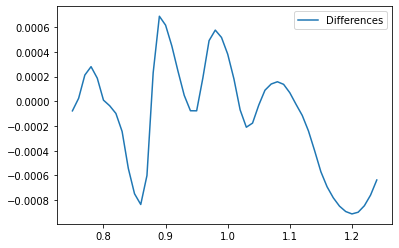

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def compute_price(S):
    inputs = torch.tensor([[1, 1, 0.8, S, 0.25, 0.02, 0.02] * nstock]).cuda()
    return model(inputs.float())[0][0]

prices = np.arange(0.75, 1.25, 0.01)
model_call_prices = []
correct_call_prices = []
for p in prices:
    initial_stocks = jnp.array([p]*numstocks) # must be float
    model_call_prices.append(compute_price(p).item())
    correct_call_prices.append(optionvalueavg(key, initial_stocks, numsteps, drift, r, cov, K, B, T))

#plt.plot(prices, model_call_prices, label = "model_call_prices")
#plt.plot(prices, correct_call_prices, label = "correct_call_prices")
plt.plot(prices, np.array(model_call_prices)-np.array(correct_call_prices), label = "Differences")
plt.legend()
plt.show()

# Delta

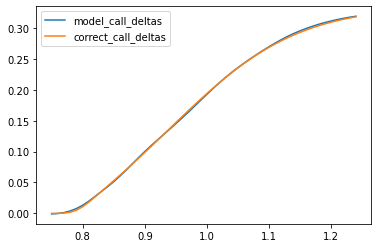

In [30]:
##Using gradient, Change only 1 S0 at a time
%matplotlib inline
from torch.autograd import grad
import pylab
import numpy as np

def compute_delta(S):
    inputs = torch.tensor([[1, 1, 0.8, S, 0.25, 0.02, 0.02] * nstock]).cuda()
    return model(inputs.float())[0][1]

prices = np.arange(0.75, 1.25, 0.01)
model_call_deltas = []
correct_call_deltas = []
for p in prices:
    initial_stocks = jnp.array([p]*nstock) # must be float
    model_call_deltas.append(compute_delta(p).item())
    correct_call_deltas.append(goptionvalueavg(keys, initial_stocks, numsteps, drift, r, cov, 1.0, B, T)[0])

plt.plot(prices, model_call_deltas, label = "model_call_deltas")
plt.plot(prices, correct_call_deltas, label = "correct_call_deltas")
#plt.plot(prices, np.array(model_call_deltas)-np.array(correct_call_deltas), label = "Differences")
plt.legend()
plt.show()

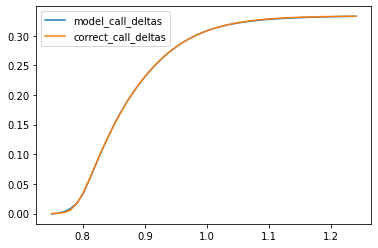

In [31]:
##Using gradient, Change only 1 S0 at a time
%matplotlib inline
from torch.autograd import grad
import pylab
import numpy as np

def compute_delta(S):
    inputs = torch.tensor([[1, 0.775, 0.8, S, 0.25, 0.02, 0.02] * nstock]).cuda()
    return model(inputs.float())[0][1]

prices = np.arange(0.75, 1.25, 0.01)
model_call_deltas = []
correct_call_deltas = []
for p in prices:
    initial_stocks = jnp.array([p]*nstock) # must be float
    model_call_deltas.append(compute_delta(p).item())
    correct_call_deltas.append(goptionvalueavg(keys, initial_stocks, numsteps, drift, r, cov, 0.775, B, T)[0])

plt.plot(prices, model_call_deltas, label = "model_call_deltas")
plt.plot(prices, correct_call_deltas, label = "correct_call_deltas")
#plt.plot(prices, np.array(model_call_deltas)-np.array(correct_call_deltas), label = "Differences")
plt.legend()
plt.show()

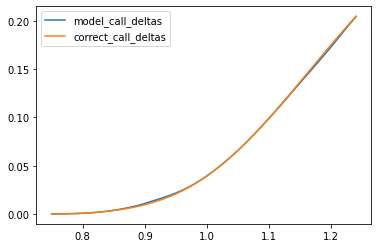

In [32]:
##Using gradient, Change only 1 S0 at a time
%matplotlib inline
from torch.autograd import grad
import pylab
import numpy as np

def compute_delta(S):
    inputs = torch.tensor([[1, 1.225, 0.8, S, 0.25, 0.02, 0.02] * nstock]).cuda()
    return model(inputs.float())[0][1]

prices = np.arange(0.75, 1.25, 0.01)
model_call_deltas = []
correct_call_deltas = []
for p in prices:
    initial_stocks = jnp.array([p]*nstock) # must be float
    model_call_deltas.append(compute_delta(p).item())
    correct_call_deltas.append(goptionvalueavg(keys, initial_stocks, numsteps, drift, r, cov, 1.225, B, T)[0])

plt.plot(prices, model_call_deltas, label = "model_call_deltas")
plt.plot(prices, correct_call_deltas, label = "correct_call_deltas")
#plt.plot(prices, np.array(model_call_deltas)-np.array(correct_call_deltas), label = "Differences")
plt.legend()
plt.show()

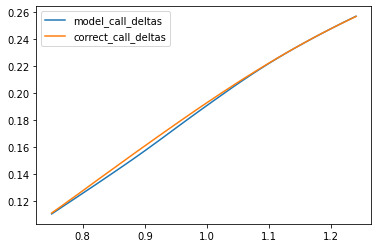

In [33]:
##Using gradient, Change only 1 S0 at a time
%matplotlib inline
from torch.autograd import grad
import pylab
import numpy as np

def compute_delta(S):
    inputs = torch.tensor([[1, 1, 0.8, S, 0.25, 0.02, 0.02] + [1, 1, 0.8, 1.225, 0.25, 0.02, 0.02] + [1, 1, 0.8, 0.775, 0.25, 0.02, 0.02]]).cuda()
    return model(inputs.float())[0][1]

prices = np.arange(0.75, 1.25, 0.01)
model_call_deltas = []
correct_call_deltas = []
for p in prices:
    initial_stocks = jnp.array([p, 1.225, 0.775]) # must be float
    model_call_deltas.append(compute_delta(p).item())
    correct_call_deltas.append(goptionvalueavg(keys, initial_stocks, numsteps, drift, r, cov, 1.0, B, T)[0])

plt.plot(prices, model_call_deltas, label = "model_call_deltas")
plt.plot(prices, correct_call_deltas, label = "correct_call_deltas")
#plt.plot(prices, np.array(model_call_deltas)-np.array(correct_call_deltas), label = "Differences")
plt.legend()
plt.show()